In [56]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [77]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import missingno as msno
import seaborn as sns
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
#from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import  accuracy_score
import missingno
from sklearn.compose import ColumnTransformer, make_column_selector
from sklearn.preprocessing import StandardScaler, OneHotEncoder#, OrdinalEncoder, LabelEncoder
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.impute import SimpleImputer
#from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
# Set pandas as the default output for sklearn

In [73]:
file_name ='/content/drive/MyDrive/Week2_data/Machine Learning Data Sets/Belt2_C_occupancy_v2_final.csv'
df = pd.read_csv(file_name)
df.head()

,Temperature,Humidity,CO2,IsWeekend,DayOfMonth,Occupancy
0,22.245,Med,Med,Weekday,5,1
1,21.39,High,High,weekday,9,1
2,19_35666667,NaN,Low,Weekday,9,0
3,22.1,NaN,Low,Weekend,7,0
4,21.39,NaN,High,weekday,9,0


In [74]:
#handling data inconsistences in the Temperature column by replacing '_'
distinct_values = sorted(df['Temperature'].unique(), reverse=True)
df['Temperature'] = df['Temperature'].str.replace('_', '.')

In [60]:
df.head()

,Temperature,Humidity,CO2,IsWeekend,DayOfMonth,Occupancy
0,22.245,Med,Med,Weekday,5,1
1,21.39,High,High,weekday,9,1
2,19.35666667,NaN,Low,Weekday,9,0
3,22.1,NaN,Low,Weekend,7,0
4,21.39,NaN,High,weekday,9,0


In [75]:
df['Temperature'] = df['Temperature'].astype(float)

In [34]:
df.dtypes

Temperature    float64
Humidity        object
CO2             object
IsWeekend       object
DayOfMonth       int64
Occupancy        int64
dtype: object

In [79]:
# split in to train and test
target = 'Occupancy'
X = df.drop(columns=target)
y = df[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [63]:
X_train.dtypes

Temperature    float64
Humidity        object
CO2             object
IsWeekend       object
DayOfMonth       int64
dtype: object

<Axes: >

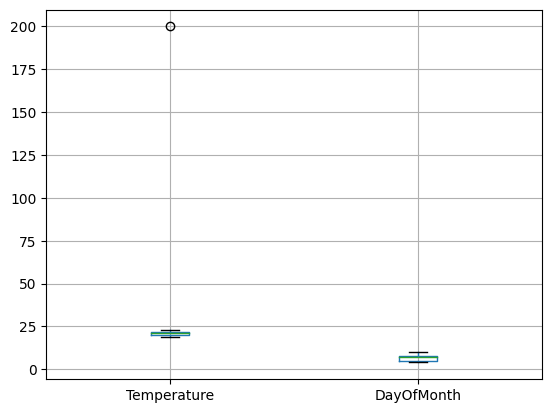

In [80]:
X_train.boxplot()

In [54]:
'''# Function to replace outliers with median
def replace_outliers_with_median(X_train, col):
  median = X_train[col].median()
  Define a threshold for outliers, you can customize this threshold based on your data distribution
  threshold = 1.5 * (X_train[col].quantile(0.75) - X_train[col].quantile(0.25))
  X_train.loc[outliers, col] = median

# Specify the column with outliers
outlier_column = 'Temperature'

# Replace outliers with median
replace_outliers_with_median(X_train, outlier_column)

print(X_train)


      Temperature Humidity   CO2 IsWeekend  DayOfMonth
199     20.290000      Low   Low   weekday           6
700     19.445000      NaN   Low   Weekday           9
526     20.000000      NaN   Med   Weekday           9
1223    22.050000      Med   Med   Weekday           5
1603    23.075000      NaN   Low   Weekend           7
...           ...      ...   ...       ...         ...
1130    20.700000      NaN   Med   weekday           9
1294    21.525000     High  High   Weekday           9
860     20.823333      NaN   Med   Weekday           9
1459    21.890000     High  High   Weekday           9
1126    21.100000      Low   Med   weekday           6

[1406 rows x 5 columns]


In [66]:
def replace_outliers_with_median(X_train, col):
    # Calculate the median of the specified column
    median = X_train[col].median()

    # Calculate the interquartile range (IQR) to define the threshold for outliers
    Q1 = X_train[col].quantile(0.25)
    Q3 = X_train[col].quantile(0.75)
    IQR = Q3 - Q1

    # Define the threshold for outliers (commonly 1.5 times the IQR)
    threshold = 1.5 * IQR

    # Identify outliers based on the threshold
    outliers = (X_train[col] < Q1 - threshold) | (X_train[col] > Q3 + threshold)

    # Replace outliers with median
    X_train.loc[outliers, col] = median

# Example usage:
# Specify the column with outliers
outlier_column = 'Temperature'

# Replace outliers with median for the specified column
replace_outliers_with_median(X_train, outlier_column)

In [83]:
# Function to replace outliers with median
def replace_outliers_with_median(X_train, col):
    median = X_train[col].median()
# Specify the column with outliers
outlier_column = 'Temperature'
# Replace outliers with median
replace_outliers_with_median(X_train, outlier_column)

print(X_train)


      Temperature Humidity   CO2 IsWeekend  DayOfMonth
199     20.290000      Low   Low   weekday           6
700     19.445000      NaN   Low   Weekday           9
526     20.000000      NaN   Med   Weekday           9
1223    22.050000      Med   Med   Weekday           5
1603    23.075000      NaN   Low   Weekend           7
...           ...      ...   ...       ...         ...
1130    20.700000      NaN   Med   weekday           9
1294    21.525000     High  High   Weekday           9
860     20.823333      NaN   Med   Weekday           9
1459    21.890000     High  High   Weekday           9
1126    21.100000      Low   Med   weekday           6

[1406 rows x 5 columns]


In [70]:
# Function to replace outliers with median
def replace_outliers_with_median(X_test, col):
    median = X_test[col].median()
# Specify the column with outliers
outlier_column = 'Temperature'
# Replace outliers with median
replace_outliers_with_median(X_test, outlier_column)

print(X_test)


      Temperature Humidity   CO2 IsWeekend  DayOfMonth
1125    20.865000      Low   Med   Weekday           6
1030    21.533333      NaN   Med   weekday           6
1450    21.323333     High  High   weekday           9
1494    21.100000      Low   Low   Weekend           7
344     22.856667      Low   Low   Weekend           7
...           ...      ...   ...       ...         ...
494     21.675000      Low   Med   weekday           6
1050    22.426667       Hi   Med   Weekday           5
1542    21.200000      Low   Low   Weekend           7
1652    20.700000      NaN   Low   Weekday           6
381     22.340000      NaN   Med   weekday           4

[352 rows x 5 columns]


<Axes: >

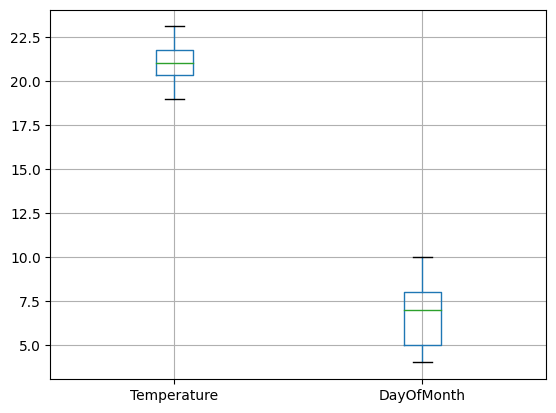

In [82]:
X_test.boxplot()

In [41]:
# Check for null values in numeric columns of trainingset
X_train.isna().sum()

Temperature      0
Humidity       443
CO2              0
IsWeekend        0
DayOfMonth       0
dtype: int64

In [67]:
# Define the list of features for this strategy
num_cols = X_train.select_dtypes("number").columns
# Instantiate the imputer object from the SimpleImputer class with strategy 'median'
impute_median = SimpleImputer(strategy='median')
# Fit the imputer object on the numeric training data with .fit()
impute_median.fit(X_train[num_cols])
# Transform the training data
X_train_num_imputed = impute_median.transform(X_train[num_cols])
# Transfrom the testing data
X_test_num_imputed = impute_median.transform(X_test[num_cols])

In [68]:
# Define list of features for this strategy
cat_cols = X_train.select_dtypes("object").columns
# Instantiate the imputer with the desired strategy
impute_na = SimpleImputer(strategy='constant', fill_value='NA')
# impute_na = SimpleImputer(strategy='most_frequent')
# Fit the imputer object on the training data with .fit
impute_na.fit(X_train[cat_cols])
# Transform the categorical training data
X_train_cat_imputed = impute_na.transform(X_train[cat_cols])
# Transform the categorical testing data
X_test_cat_imputed = impute_na.transform(X_test[cat_cols])

In [69]:
# Check for null values in numeric columns of trainingset
X_train.isna().sum()

Temperature      0
Humidity       443
CO2              0
IsWeekend        0
DayOfMonth       0
dtype: int64